In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras

2024-10-23 11:57:32.118620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dir_path = os.getcwd()
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir= dir_path+'/dataset', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'/Users/mac/Learning/ml/ml-learning/dataset/datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Users/mac/Learning/ml/ml-learning/dataset/datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('flower_photos/*/*.jpg')))

In [6]:
roses = list(data_dir.glob("flower_photos/roses/*"))
tulips = list(data_dir.glob("flower_photos/tulips/*"))
daisy = list(data_dir.glob("flower_photos/daisy/*"))
sunflowers = list(data_dir.glob("flower_photos/sunflowers/*"))
dandelion = list(data_dir.glob("flower_photos/dandelion/*"))

In [7]:
flowers_dict = {
    'roses' : roses,
    'daisy' : daisy,
    'dandelion' : dandelion,
    'sunflowers' : dandelion,
    'tulips' : tulips
}
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

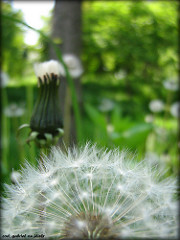

In [8]:
PIL.Image.open(str(dandelion[10]))

In [9]:
img = cv2.imread(str(flowers_dict['roses'][0]))
img.shape

(243, 500, 3)

In [10]:
X, y = [], []

for flower, images in flowers_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower])
        
X = np.array(X)
y = np.array(y)

In [11]:
y[:5]

array([0, 0, 0, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
# Data augmentation  
data_augmentation = keras.Sequential([
    # layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    keras.layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
    ])

/opt/miniconda3/envs/ml_tf/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model = keras.models.Sequential([
    ## data augmentation
    data_augmentation,
  
    ## cnn
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
   
    ## ann
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1)              


91/91 ━━━━━━━━━━━━━━━━━━━━ 58s 618ms/step - accuracy: 0.2532 - loss: 1.7146


In [54]:
model.evaluate(X_test_scaled, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.4364 - loss: 1.2561


[1.2536636590957642, 0.42975205183029175]

In [ ]:
model = keras.models.Sequential([
    ## cnn
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
    ## ann
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1)              
